Detected target column: target


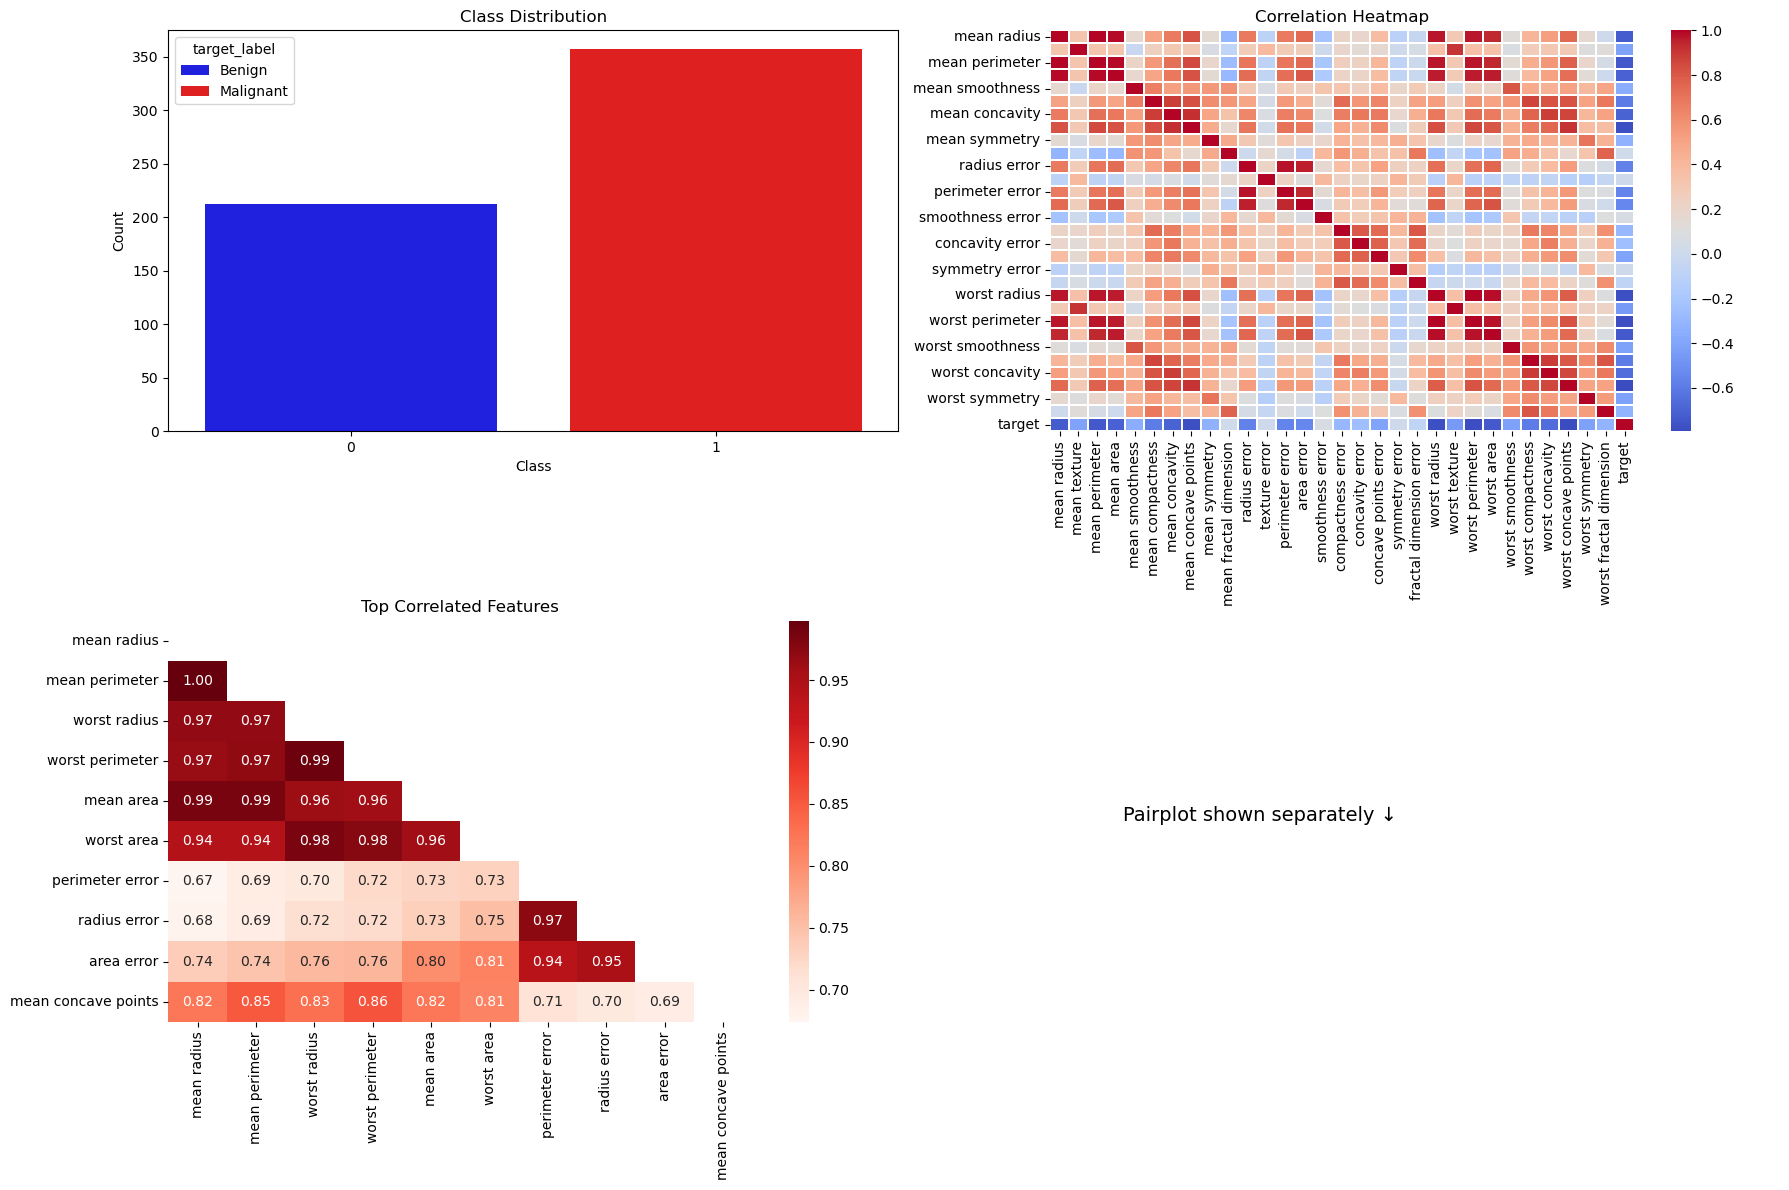

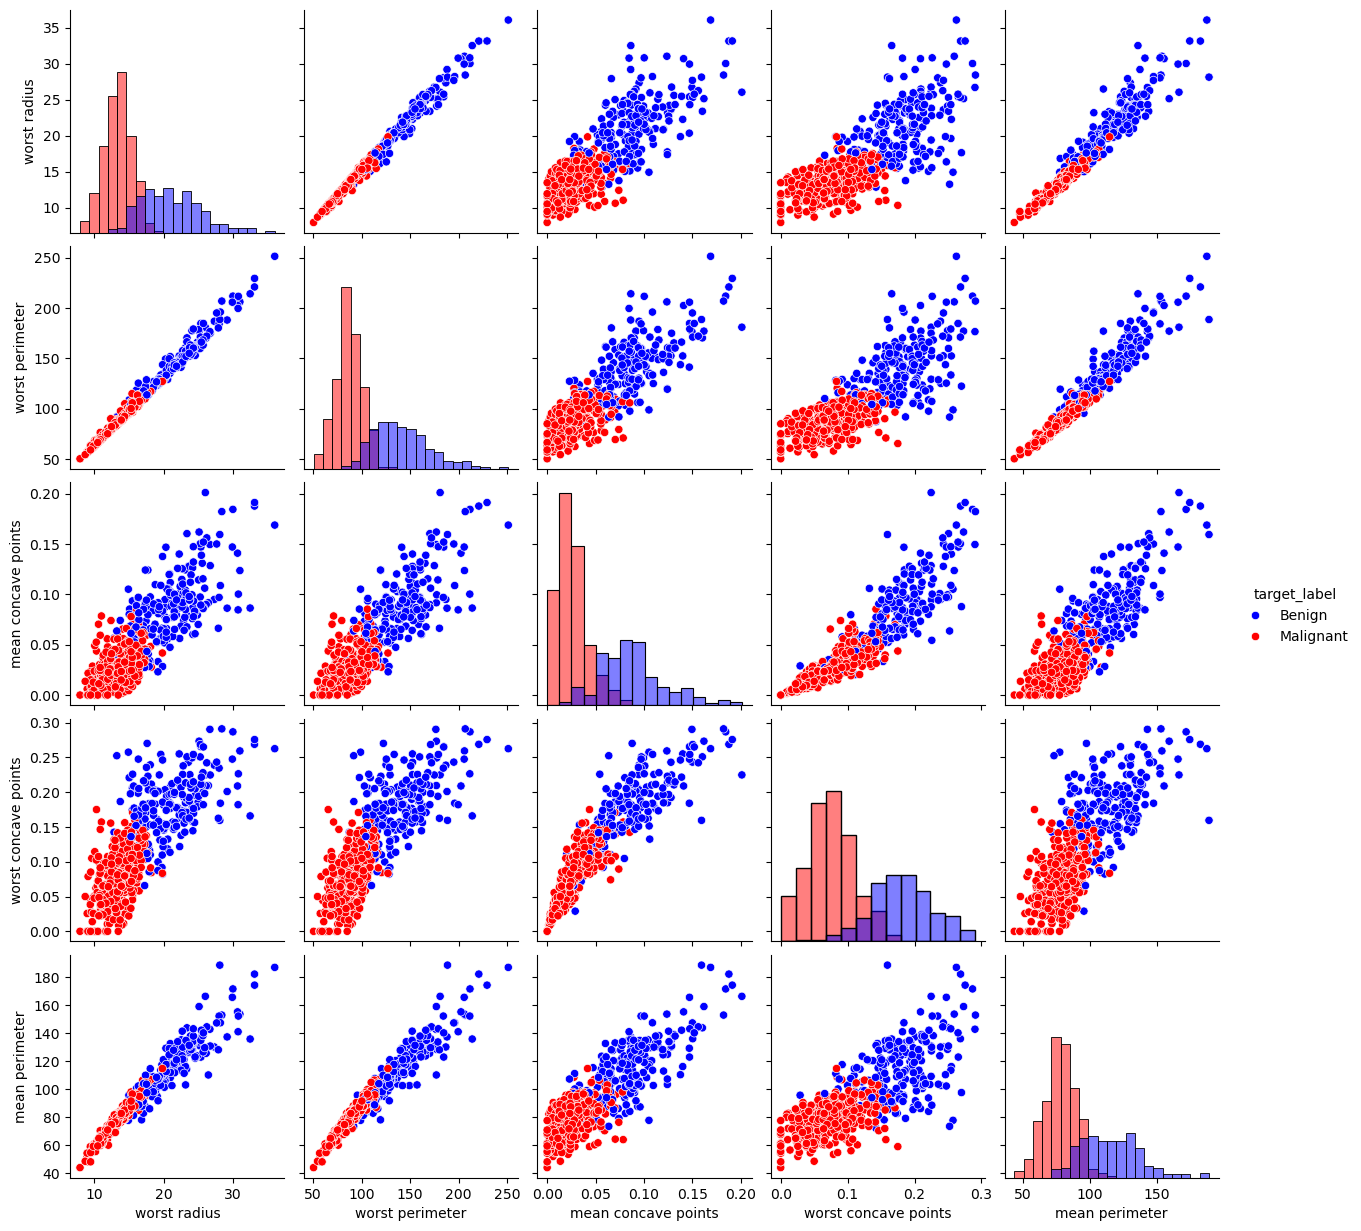

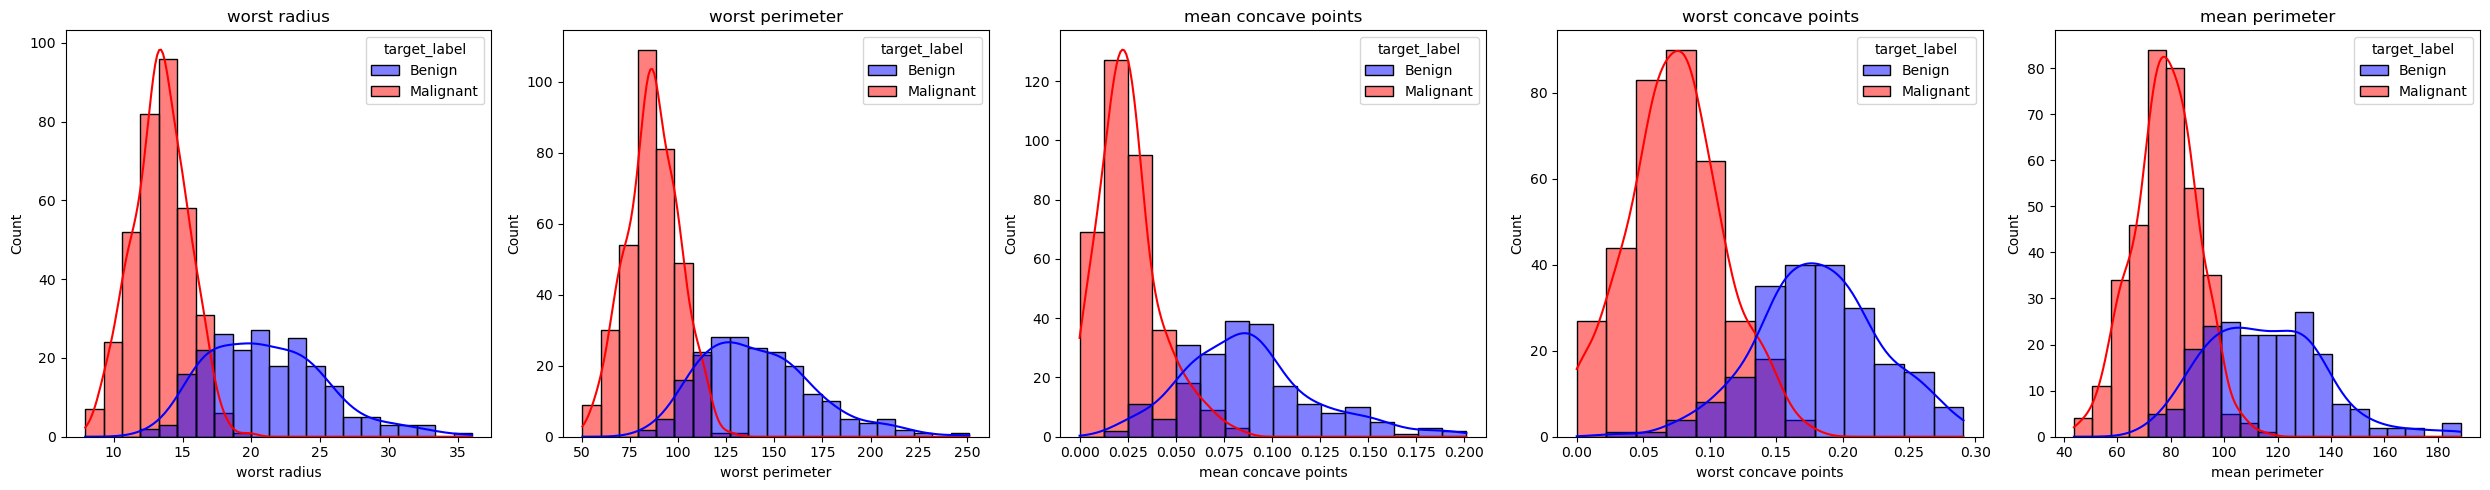

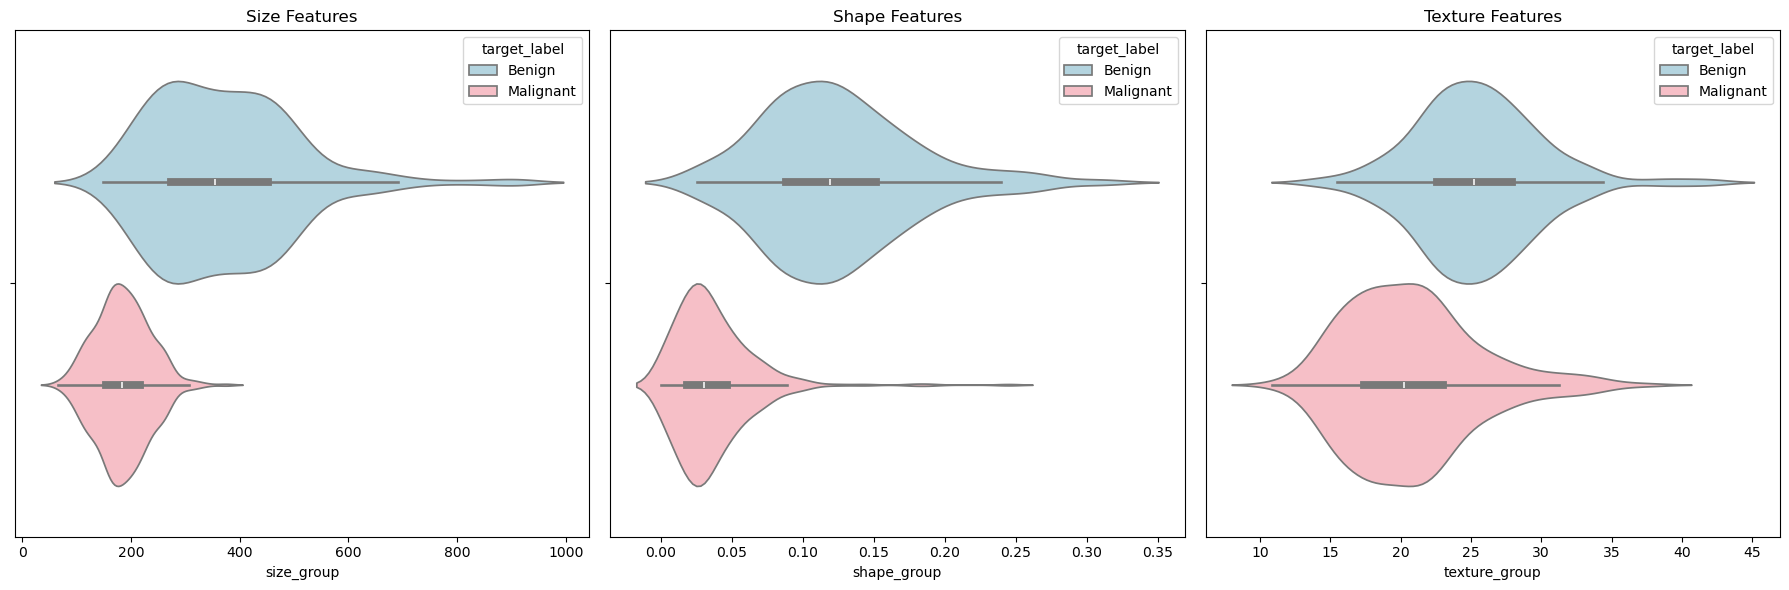

In [8]:
             #Breast Cancer Exploratory Analysis – Unified Plots & Insights
   

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# -------------------------------
# 1. Load dataset
# -------------------------------
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

# -------------------------------
# 2. Map target to readable labels
# -------------------------------
target_mapping = {0: "Benign", 1: "Malignant"}
df["target_label"] = df["target"].map(target_mapping)

# -------------------------------
# 3. Detect target column
# -------------------------------
def find_target_column(df):
    for col in df.columns:
        if col.lower() in ["target", "label", "class"]:
            return col
    for col in df.columns:
        if df[col].nunique() == 2:
            return col
    return None

target_col = find_target_column(df)
print("Detected target column:", target_col)

# -------------------------------
# 4. Define palettes
# -------------------------------
palette_strong = {"Benign": "blue", "Malignant": "red"}      # countplot, histograms, pairplot
palette_soft = {"Benign": "lightblue", "Malignant": "lightpink"}  # violin plots
hue_order = ["Benign", "Malignant"]

# -------------------------------
# 5. Multi-subplot figure (Countplot + Correlation + Top Correlated Features)
# -------------------------------
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

# Countplot
sns.countplot(
    x=target_col,
    hue="target_label",
    data=df,
    palette=palette_strong,
    hue_order=hue_order,
    ax=axes[0]
)
axes[0].set_title("Class Distribution")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")

# Full correlation heatmap
numeric_df = df.select_dtypes(include="number")
corr_matrix = numeric_df.corr()
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    linewidths=0.2,
    ax=axes[1]
)
axes[1].set_title("Correlation Heatmap")

# Top 10 correlated features
corr_abs = corr_matrix.abs()
np.fill_diagonal(corr_abs.values, 0)
top_features = corr_abs.max().sort_values(ascending=False).head(10).index.tolist()
mask = np.triu(np.ones((10, 10), dtype=bool))

sns.heatmap(
    corr_abs.loc[top_features, top_features],
    cmap="Reds",
    mask=mask,
    annot=True,
    fmt=".2f",
    ax=axes[2]
)
axes[2].set_title("Top Correlated Features")

# Placeholder for pairplot
axes[3].text(0.1, 0.5, "Pairplot shown separately ↓", fontsize=14)
axes[3].axis("off")

plt.tight_layout()
plt.show()

# -------------------------------
# 6. Pairplot (separate figure)
# -------------------------------
pair_features = ['worst radius', 'worst perimeter', 'mean concave points',
                 'worst concave points', 'mean perimeter']

sns.pairplot(
    df[pair_features + ["target_label"]],
    hue="target_label",
    palette=palette_strong,
    hue_order=hue_order,
    diag_kind="hist"
)
plt.show()

# -------------------------------
# 7. Histograms of top features
# -------------------------------
top_features_hist = ['worst radius', 'worst perimeter', 'mean concave points',
                     'worst concave points', 'mean perimeter']

fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for i, feature in enumerate(top_features_hist):
    sns.histplot(
        df,
        x=feature,
        hue="target_label",
        kde=True,
        palette=palette_strong,
        hue_order=hue_order,
        alpha=0.5,
        ax=axes[i]
    )
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

# -------------------------------
# 8. Grouped Feature Violin Plots (soft colors)
# -------------------------------
df["size_group"] = df[['mean radius', 'mean perimeter', 'mean area']].mean(axis=1)
df["shape_group"] = df[['mean concave points', 'mean concavity']].mean(axis=1)
df["texture_group"] = df[['mean texture', 'worst texture']].mean(axis=1)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.violinplot(
    x="size_group",
    hue="target_label",
    data=df,
    palette=palette_soft,
    hue_order=hue_order,
    ax=axes[0]
)
axes[0].set_title("Size Features")

sns.violinplot(
    x="shape_group",
    hue="target_label",
    data=df,
    palette=palette_soft,
    hue_order=hue_order,
    ax=axes[1]
)
axes[1].set_title("Shape Features")

sns.violinplot(
    x="texture_group",
    hue="target_label",
    data=df,
    palette=palette_soft,
    hue_order=hue_order,
    ax=axes[2]
)
axes[2].set_title("Texture Features")

plt.tight_layout()
plt.show()
